# Analysis of players in EA FC26 game

This notebook analyzes attributes of football players available in EA FC26 game.


## 1 Loading of dataset

In this section the following is executed:
- Import of libraries necessary for the analysis
- Loading of the dataset
- Basic information of the dataset are shown

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("EAFC26.csv")

## 2 Analysis of data types

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17873 entries, 0 to 17872
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     17873 non-null  int64  
 1   Rank                   17873 non-null  int64  
 2   Name                   17873 non-null  object 
 3   GENDER                 17873 non-null  object 
 4   OVR                    17873 non-null  int64  
 5   PAC                    17873 non-null  int64  
 6   SHO                    17873 non-null  int64  
 7   PAS                    17873 non-null  int64  
 8   DRI                    17873 non-null  int64  
 9   DEF                    17873 non-null  int64  
 10  PHY                    17873 non-null  int64  
 11  Acceleration           17873 non-null  int64  
 12  Sprint Speed           17873 non-null  int64  
 13  Positioning            17873 non-null  int64  
 14  Finishing              17873 non-null  int64  
 15  Sh

> Based on the command `df.info()` this info is shown:
> - This dataset has 17 873 entries (or rows) and 59 columns
> - 5 of these columns are of type `float64`
> - 41 of these columns are of type `int64`
> - 13 of these columns are of type `object`

### 2.1 Columns description

Number in parenthesis (#) represents the index of a column in dataframe.
***
#### General informative columns

Consists of columns: `ID`, `Rank`, `Name`, `GENDER`, `Height`, `Weight`, `Age`

1. **ID (0)** - Identification number of a player in game, `int64`
2. **Rank (1)** - Ranking of a player based on his overall statistics, `int64`
3. **Name (2)** - Name of the player, `object`
4. **GENDER (3)** - Gender of the player, `object`
    - M - Male
    - F - Female
5. **Height (44)** - Height of the player, `object`
    - metric/imperial
6. **Weight (45)** - Weight of the player, `object`
    - metric/imperial
7. **Age (47)** - Age of the player, `int64`
***
#### Face-stats or player attributes (Card-stats)

Consists of columns: `OVR`, `PAC`, `SHO`, `PAS`, `DRI`, `DEF`, `PHY`

1. **OVR (4)** - Overall stats of a player, calculation based on all the player attributes, `int64`
2. **PAC (5)** - Pace of the player, `int64`
3. **SHO (6)** - Shooting ability of a player, `int64`
4. **PAS (7)** - Passing ability of a player, `int64`
5. **DRI (8)** - Dribbling ability of a player, `int64`
6. **DEF (9)** - Defending abiility of a player, `int64`
7. **PHY (10)** - Physical attributes of a player, `int64`
***
#### Player sub-attributes

Consists of columns: `Acceleration`, `Sprint Speed`, `Positioning`, `Finishing`, `Shot Power`, `Long Shots`, `Volleys`, `Penalties`, `Vision`, `Crossing`, `Free Kick Accuracy`, `Short Passing`, `Long Passing`, `Curve`, `Dribbling`, `Agility`, `Balance`, `Reactions`, `Ball Control`, `Composure`, `Interceptions`, `Heading Accuracy`, `Def Awareness`, `Standing Tackle`, `Sliding Tackle`, `Jumping`, `Stamina`, `Strength`, `Aggression`

- **Sub attributes used to calculate Face-stat `PAC`:**
    1. **Acceleration (11)** - Speed at which a player gets up to top speed, `int64`
    2. **Sprint Speed (12)** - Maximum speed a player can maintain while running, `int64`
- **Sub attributes used to calculate Face-stat `SHO`:**
    1. **Positioning (13)** - Sense of where a player is likely to be during attacking plays, `int64`
    2. **Finishing (14)** - Accuracy and quality of shots taken inside the penalty box, `int64`
    3. **Shot Power (15)** - How strong a player strikes the ball; affects shot velocity, `int64`
    4. **Long Shots (16)** - Accuracy and effectiveness of shots taken from outside the box, `int64`
    5. **Volleys (17)** - Ability to strike the ball accurately while it’s in the air, `int64`
    6. **Penalties (18)** - Accuracy and composure when taking penalty kicks, `int64`
- **Sub attributes used to calculate Face-stat `PAS`:**
    1. **Vision (19)** - Ability to see and select passing options; helps create scoring opportunities, `int64`
    2. **Crossing (20)** - Accuracy and quality of crosses into the box, `int64`
    3. **Free Kick Accuracy (21)** - Accuracy and technique when taking free kicks, `int64`
    4. **Short Passing (22)** - Accuracy and consistency of short passes, `int64`
    5. **Long Passing (23)** - Accuracy and effectiveness of long passes, `int64`
    6. **Curve (24)** - Ability to bend or curve the ball on passes or shots, `int64`
- **Sub attributes used to calculate Face-stat `DRI`:**
    1. **Dribbling (25)** - Skill in controlling and maneuvering the ball while running, `int64`
    2. **Agility (26)** - How quickly a player can change direction; affects dribbling and turns, `int64`
    3. **Balance (27)** - Ability to stay upright when challenged or running at speed, `int64`
    4. **Reactions (28)** - How quickly a player responds to events around them, `int64`
    5. **Ball Control (29)** - Skill at controlling the ball after receiving it, `int64`
    6. **Composure (30)** - Calmness under pressure; affects finishing, passing, and dribbling in tight situations, `int64`
- **Sub attributes used to calculate Face-stat `DEF`:**
    1. **Interceptions (31)** - Ability to anticipate passes and cut them off, `int64`
    2. **Heading Accuracy (32)** - Accuracy and effectiveness when heading the ball, `int64`
    3. **Def Awareness (33)** - Awareness of defensive positioning and opponent movements, `int64`
    4. **Standing Tackle (34)** - Effectiveness of tackling when standing still or moving slowly, `int64`
    5. **Sliding Tackle (35)** - Effectiveness of sliding tackles to dispossess an opponent, `int64`
- **Sub attributes used to calculate Face-stat `PHY`:**
    1. **Jumping (36)** - Ability to jump for headers or aerial duels, `int64`
    2. **Stamina (37)** - Ability to sustain physical effort throughout the match, `int64`
    3. **Strength (38)** - Physical power; helps win duels, shield the ball, and hold off opponents, `int64`
    4. **Aggression (39)** - Willingness to engage in challenges, press opponents, and win duels, `int64`
***
#### Other player attributes

Consists of columns: `Weak foot`, `Skill moves`, `Preferred foot`

1. **Weak foot (41)** - Measures how well a player can use their non-dominant foot, `int64`
    - 1 - Very weak
    - 2 - Weak
    - 3 - Average
    - 4 - Good
    - 5 - Excellent
2. **Skill moves (42)** - Measures how many star-level skill moves a player can perform, `int64`
    - 1 - Very limited skill moves
    - 2 - Can perform basic tricks
    - 3 - Can do medium-level skill moves
    - 4 - Can perform advanced tricks
    - 5 - Can perform all high-level skill moves, including the most advanced tricks
3. **Preferred foot (43)** - Which foot of a player is their dominant, `object`
    - Left - left foot is dominant
    - Right - right foot is dominant
4. **play style (51)** - List of different play styles a player can have that improves his game efficiency, `object`
***
#### Goalkeeper attributes

> These attributes are destined only for goalkeepers

Consists of columns: `GK Diving`, `GK Handling`, `GK Kicking`, `GK Positioning`, `GK Reflexes`

1. **GK Diving (53)** - Measures the goalkeeper’s ability to dive toward the ball to make saves, `float64`
2. **GK Handling (54)** - Determines how well a goalkeeper catches or holds onto the ball after a save, `float64`
3. **GK Kicking (55)** - Measures power and accuracy of goal kicks, punts, and long clearances, `float64`
4. **GK Positioning (56)** - Represents the goalkeeper’s awareness of where to be in goal relative to the ball, attacker, and goal line, `float64`
5. **GK Reflexes (57)** - Determines how fast and effectively a goalkeeper reacts to shots at close range, `float64`

> **These columns for goalkeepers replace field player columns in this order:**
> - `GK Diving` replaces column `PAC`
> - `GK Handling` replaces column `SHO`
> - `GK Kicking` replaces column `PAS`
> - `GK Positioning` replaces column `PHY`
> - `GK Reflexes` replaces column `DRI`
> - Finaly the name of a column `DEF` is changed to `GK Speed`
***
#### Player field and team attributes

Consists of columns: `Position`, `Alternative positions`, `Nation`, `League`, `Team`

1. **Position (40)** - Field position of a player, `object`
    - Goalkeeping positions:
        - **GK, Goalkeeper** - Defend the goal, stop shots, organize the defense
    - Defending positions:
        - **CB, Centre-Back** - Mark strikers, intercept passes, win aerial duels, tackle
        - **LB/RB, Left-Back/Right-Back** - Defend wide areas, support attack with overlaps, deliver crosses
    - Midfield positions:
        - **CDM, Central Defensive Midfielder** - Break up attacks, shield the defense, start build-ups
        - **CM, Central Midfielder** - Link defense and attack, distribute passes, support both ends
        - **CAM, Central Attacking Midfielder** - Create chances, assist, score from distance
        - **LM/RM, Left Midfielder/Right Midfielder** - Provide width, cross, support attack and defense
    - Attacking positions:
        - **LW/RW, Left Wing/Right Wing** - Dribble past defenders, provide crosses, cut inside to shoot
        - **ST, Striker** - Score goals, lead the line, press defense
2. **Alternative positions (46)** - Alternative positions on which the player can perform efficiently besides main position, `object`
3. **Nation (48)** - Nation which the player is representing during national duty, `object`
4. **League (49)** - Football league in which the player is currently playing, `object`
5. **Team (50)** - Football team in which the player is currently playing, `object`
***
#### Other columns

Consists of columns: `url`, `card`

1. **url (52)** - URL address of the EA official site of the player
2. **card (58)** - link for the official card with stats of the player
***

## 3 Analysis of NaN values (Not-a-Number)

In [3]:
nans = df.isna().sum()
nans_sorted = nans.loc[nans > 0].sort_values(ascending=False).to_frame(name="NaN Count")
nans_sorted["NaN Percentage"] = (nans_sorted["NaN Count"]*100)/df.shape[0]
nans_sorted["Valid Values Count"] = df.count()
nans_sorted

,NaN Count,NaN Percentage,Valid Values Count
GK Diving,15859,88.731606,2014
GK Handling,15859,88.731606,2014
GK Positioning,15859,88.731606,2014
GK Kicking,15859,88.731606,2014
GK Reflexes,15859,88.731606,2014
Alternative positions,6380,35.696302,11493


### 3.1 Explanation of NaN values

> **Main problem** of NaN values in this dataset are the columns: `GK Diving`, `GK Handling`, `GK Positioning`, `GK Kicking` and `GK Reflexes`.

> It is because these columns are destined for `GK` position only, so these stats are assigned to the players that play as a goalkeeper. Regular or field players do not have these kind of stats so therefore their values at these columns will be `NaN`.
***
> **Another problem** is the column `Alternative positions`, which is pretty self-explanatory, since not all the players could play on multiple positions. Some of the players are capable of playing on multiple positions so they have their alternative positions mentioned in this column. On the other hand there are also players that do not have any alternative positions since in the game they are capable of only playing efficiently on one position.

## 4 Preparation for the analysis

I have decided that I will analyze the **Face-stats** of players so the main focus will be on these columns: `OVR`, `PAC`, `SHO`, `DRI`, `PAS`, `DEF` and `PHY`

> The dataset contains both **male** and **female** footballers so for more accurate analysis I will divide them using column `GENDER` and analyze their stats separately

Since goalkeepers have their own stats I will analyze them separately too, so the main columns for goalkeepers will be these: `OVR`, `GK Diving`, `GK Handling`, `GK Positioning`, `GK Kicking` and `GK Reflexes`

Another important columns that I will use in my analysis are: `Name`, `Position`, `Nation`, `League`

> Also I will add a new column that will group the **positions** of players into a logical unit just like this:
> - Goalkeeping positions marked as **GK**: GK
> - Defensive positions marked as **DEF**: LB/RB, CB
> - Midfielder positions marked as **MID**: LM/RM, CDM, CM, CAM
> - Attacking positions marked as **ATT**: LW/RW, ST
> This column will be called **PositionGroup**

### 4.1 Adding **PositionGroup** column

In this step I will add the earlier mentioned `PositionGroup` column that will unite players into logical untis base on their positions in `Position` column.

In [4]:
pos_groups = {
    "GK": ["GK"],
    "DEF": ["LB", "RB", "CB"],
    "MID": ["LM", "RM", "CDM", "CM", "CAM"],
    "ATT": ["LW", "RW", "ST"]
}

for group, positions in pos_groups.items():
    df.loc[df.Position.isin(positions), "PositionGroup"] = group
    

df.loc[0:19, ["Name", "Position", "PositionGroup"]]

,Name,Position,PositionGroup
0,Mohamed Salah,RM,MID
1,Alexia Putellas,CM,MID
2,Kylian Mbappé,ST,ATT
3,Aitana Bonmatí,CM,MID
4,Ousmane Dembélé,ST,ATT
5,Rodri,CDM,MID
6,Caroline Graham Hansen,RW,ATT
7,Virgil van Dijk,CB,DEF
8,Jude Bellingham,CAM,MID
9,Erling Haaland,ST,ATT


### 4.2 Preparing logic for dataframe views

In this step I will prepare some helping variables which will be important later in the analysis.

In [5]:
base_cols = ["GENDER", "Name", "Nation", "League", "Position", "PositionGroup"]
field_players_cols = base_cols + ["OVR", "PAC", "SHO", "PAS", "DRI", "DEF", "PHY"]
goalkeepers_cols = base_cols + ["OVR", "GK Diving", "GK Handling", "GK Positioning", "GK Kicking", "GK Reflexes", "DEF"]
top5_leagues_men = ["Premier League", "LALIGA EA SPORTS", "Serie A Enilive", "Bundesliga", "Ligue 1 McDonald's"]
top5_leagues_women = ["Barclays WSL", "Liga F Moeve", "NWSL", "Arkema PL", "GPFBL"]

## 5 Face-stats analysis

In this section several analysis of players stats will be made. List of the analysis:

1. Average overall rating `OVR` of field players based on their `PositionGroup`:
    - In top 5 men leagues
    - In top 5 women leagues
2. Average overall rating `OVR` of goalkeepers by `Nation`:
    - for men
    - for women
3. Best `Nation` for individual stats for men and women:
    - `PAC`, `SHO`, `PAS`, `DRI`, `DEF`, `PHY` for field players
    - `GK Diving`, `GK Handling`, `GK Positioning`, `GK Kicking`, `GK Reflexes`, `GK Speed` for goalkeepers
   > **This analysis will takes a count of how many entries are higher than the median of the entries**
  
### 5.1 Average overall rating `OVR` of field players based on their `PositionGroup`

In this section I will be analyzing average overall rating of field players for both men and women. These average overall ratings will be grouped by the players `PostionGroup` and will be made in top 5 men and women football leagues.

#### 5.1.1 Average `OVR` of men players in top 5 men leagues

In [30]:
men_fps = df.loc[(df.GENDER == "M") & (df.Position != "GK") & (df.League.isin(top5_leagues_men)), field_players_cols]

grouped = men_fps.groupby(["League", "PositionGroup"]).agg(
    AvgOverallRating=("OVR", lambda x: round(x.mean(), 1))
)

league_avg = grouped.groupby("League").agg(
    OverallAverageUnited=("AvgOverallRating", lambda x: round(x.mean(), 1))
).sort_values("OverallAverageUnited", ascending=False)

avg_ovr_top5_men = grouped.loc[league_avg.index]

avg_ovr_top5_men

AvgOverallRating
League             PositionGroup                  
Premier League     ATT                        76.7
                   DEF                        76.1
                   MID                        76.9
LALIGA EA SPORTS   ATT                        75.0
                   DEF                        74.6
                   MID                        75.3
Serie A Enilive    ATT                        74.1
                   DEF                        73.3
                   MID                        73.8
Bundesliga         ATT                        72.4
                   DEF                        72.8
                   MID                        72.8
Ligue 1 McDonald's ATT                        71.3
                   DEF                        72.4
                   MID                        71.5

#### 5.1.2 Average `OVR` of women players in top 5 women leagues

In [7]:
women_fps = df.loc[(df.GENDER == "F") & (df.Position != "GK") & (df.League.isin(top5_leagues_women)), field_players_cols]

grouped = women_fps.groupby(["League", "PositionGroup"]).agg(
    AvgOverallRating=("OVR", lambda x: round(x.mean(), 1))
)

league_avg = grouped.groupby("League").agg(
    OverallAverageUnited=("AvgOverallRating", lambda x: round(x.mean(), 1))
).sort_values("OverallAverageUnited", ascending=False)

avg_ovr_top5_women = grouped.loc[league_avg.index]

avg_ovr_top5_women

AvgOverallRating
League       PositionGroup                  
Barclays WSL ATT                        73.8
             DEF                        74.7
             MID                        76.2
Arkema PL    ATT                        74.7
             DEF                        74.2
             MID                        72.7
NWSL         ATT                        73.0
             DEF                        73.0
             MID                        74.1
Liga F Moeve ATT                        73.0
             DEF                        72.3
             MID                        72.9
GPFBL        ATT                        72.0
             DEF                        71.1
             MID                        72.2

### 5.2 Average overall rating `OVR` of goalkeepers by `Nation`

In this section I will by analyzing the average overall rating `OVR` of men and women goalkeepers based on their `Nation`. Due to the fact that there are significantly more men goalkeepers than women goalkeepers I will only analyze top 5 countries where the most goalkeepers come from for both genders.

#### 5.2.1 Average overall rating `OVR` of men goalkeepers

In [8]:
men_gks = df.loc[(df.GENDER == "M") & (df.Position == "GK"), goalkeepers_cols]

men_top5_nations = men_gks.groupby("Nation")["Name"].count().sort_values(ascending=False).head(5).index

men_top5_gks_nation = men_gks[men_gks["Nation"].isin(men_top5_nations)]
men_top5_gks_by_nations = men_top5_gks_nation.groupby("Nation").agg(
    AverageOverall=("OVR", lambda x: round(x.mean(),1))
).sort_values("AverageOverall", ascending=False)

men_top5_gks_by_nations

,AverageOverall
Nation,
Spain,70.2
Argentina,67.7
Italy,67.4
Germany,65.3
England,62.4


#### 5.2.2 Average overall rating `OVR` of women goalkeepers

In [9]:
women_gks = df.loc[(df.GENDER == "F") & (df.Position == "GK"), goalkeepers_cols]

women_top5_nations = women_gks.groupby("Nation")["Name"].count().sort_values(ascending=False).head(5).index

women_top5_gks_nation = women_gks[women_gks["Nation"].isin(women_top5_nations)]
women_top5_gks_by_nations = women_top5_gks_nation.groupby("Nation").agg(
    AverageOverall=("OVR", lambda x: round(x.mean(),1))
).sort_values("AverageOverall", ascending=False)

women_top5_gks_by_nations

,AverageOverall
Nation,
United States,71.9
Germany,71.6
Spain,71.5
England,70.5
France,70.5


### 5.3 Best `Nation` for individual stats for men and women

In this section I will be analyzing **single** best stats for each men and women field players and goalkeepers. Same as in the last analysis I will be doing this analalysis only for top 5 nations with the most players for both genders.

#### 5.3.1 Best `Nation` for individual stats for men goalkeepers

Since it is a similar analysis as the last one I will reuse my previously created components.

In [34]:
men_top5_gks_single_stats_by_nation = men_top5_gks_nation.groupby("Nation").agg(
    Diving_Median=("GK Diving", "median"),
    Diving_AboveMedian=("GK Diving", lambda x: (x > x.median()).sum()),

    Handling_Median=("GK Handling", "median"),
    Handling_AboveMedian=("GK Handling", lambda x: (x > x.median()).sum()),

    Positioning_Median=("GK Positioning", "median"),
    Positioning_AboveMedian=("GK Positioning", lambda x: (x > x.median()).sum()),

    Kicking_Median=("GK Kicking", "median"),
    Kicking_AboveMedian=("GK Kicking", lambda x: (x > x.median()).sum()),

    Reflexes_Median=("GK Reflexes", "median"),
    Reflexes_AboveMedian=("GK Reflexes", lambda x: (x > x.median()).sum()),

    Speed_Median=("DEF", "median"),
    Speed_AboveMedian=("DEF", lambda x: (x > x.median()).sum()),
)

men_top5_gks_single_stats_by_nation

,Diving_Median,Diving_AboveMedian,Handling_Median,Handling_AboveMedian,Positioning_Median,Positioning_AboveMedian,Kicking_Median,Kicking_AboveMedian,Reflexes_Median,Reflexes_AboveMedian,Speed_Median,Speed_AboveMedian
Nation,,,,,,,,,,,,
Argentina,68.0,51,66.0,48,68.0,49,65.0,49,69.0,49,38.0,52
England,63.0,68,61.0,79,61.0,78,60.0,78,63.0,73,38.0,78
Germany,67.0,63,63.0,75,64.0,74,61.0,74,68.0,72,31.0,77
Italy,67.0,37,65.0,37,66.0,36,62.0,35,69.0,30,37.0,38
Spain,69.0,38,69.0,36,70.0,34,67.0,36,71.0,33,40.0,38


#### 5.3.2 Best `Nation` for individual stats for women goalkeepers

In [35]:
women_top5_gks_single_stats_by_nation = women_top5_gks_nation.groupby("Nation").agg(
    Diving_Median=("GK Diving", "median"),
    Diving_AboveMedian=("GK Diving", lambda x: (x > x.median()).sum()),

    Handling_Median=("GK Handling", "median"),
    Handling_AboveMedian=("GK Handling", lambda x: (x > x.median()).sum()),

    Positioning_Median=("GK Positioning", "median"),
    Positioning_AboveMedian=("GK Positioning", lambda x: (x > x.median()).sum()),

    Kicking_Median=("GK Kicking", "median"),
    Kicking_AboveMedian=("GK Kicking", lambda x: (x > x.median()).sum()),

    Reflexes_Median=("GK Reflexes", "median"),
    Reflexes_AboveMedian=("GK Reflexes", lambda x: (x > x.median()).sum()),

    Speed_Median=("DEF", "median"),
    Speed_AboveMedian=("DEF", lambda x: (x > x.median()).sum()),
)

women_top5_gks_single_stats_by_nation

,Diving_Median,Diving_AboveMedian,Handling_Median,Handling_AboveMedian,Positioning_Median,Positioning_AboveMedian,Kicking_Median,Kicking_AboveMedian,Reflexes_Median,Reflexes_AboveMedian,Speed_Median,Speed_AboveMedian
Nation,,,,,,,,,,,,
England,68.0,8,68.0,8,69.0,8,70.0,8,69.0,8,36.0,8
France,70.0,8,69.5,9,69.0,8,68.5,9,72.0,7,41.0,8
Germany,71.0,19,69.0,19,71.0,19,70.0,19,73.0,17,43.0,19
Spain,72.5,12,70.5,12,71.5,12,69.0,12,72.5,12,36.5,12
United States,68.5,18,69.0,17,69.5,18,68.0,17,71.5,18,39.5,18


#### 5.3.3 Best `Nation` for individual stats for men field players

In [33]:
men_fps_top5_nations = men_fps.groupby("Nation")["Name"].count().sort_values(ascending=False).head(5).index

men_fps_top5_nations_only = men_fps[
    men_fps["Nation"].isin(men_fps_top5_nations)
]

men_top5_fps_single_stat_by_nation = (
    men_fps_top5_nations_only
    .groupby(["Nation", "PositionGroup"])
    .agg(
        Pace_Median=("PAC", "median"),
        Pace_AboveMedian=("PAC", lambda x: (x > x.median()).sum()),

        Shooting_Median=("SHO", "median"),
        Shooting_AboveMedian=("SHO", lambda x: (x > x.median()).sum()),

        Passing_Median=("PAS", "median"),
        Passing_AboveMedian=("PAS", lambda x: (x > x.median()).sum()),

        Dribbling_Median=("DRI", "median"),
        Dribbling_AboveMedian=("DRI", lambda x: (x > x.median()).sum()),

        Defending_Median=("DEF", "median"),
        Defending_AboveMedian=("DEF", lambda x: (x > x.median()).sum()),

        Physicality_Median=("PHY", "median"),
        Physicality_AboveMedian=("PHY", lambda x: (x > x.median()).sum()),
    )
)

men_top5_fps_single_stat_by_nation

Pace_Median  Pace_AboveMedian  Shooting_Median  \
Nation  PositionGroup                                                   
England ATT                   78.0                14             73.5   
        DEF                   71.0                30             48.0   
        MID                   72.0                36             67.0   
France  ATT                   77.0                25             73.0   
        DEF                   70.0                50             43.0   
        MID                   68.0                56             62.0   
Germany ATT                   74.0                18             72.0   
        DEF                   71.5                39             42.0   
        MID                   68.0                41             65.0   
Italy   ATT                   68.0                11             73.0   
        DEF                   68.0                30             44.0   
        MID                   73.0                30             68.0   
Spain   ATT                   73.0                19             73.0   
        DEF                   72.0                56             50.0   
        MID                   70.0                71             68.0   

                       Shooting_AboveMedian  Passing_Median  \
Nation  PositionGroup                                         
England ATT                              14            69.0   
        DEF                              29            67.0   
        MID                              37            73.0   
France  ATT                              26            65.0   
        DEF                              49            62.0   
        MID                              58            68.0   
Germany ATT                              18            59.0   
        DEF                              38            61.0   
        MID                              42            68.5   
Italy   ATT                              13            59.5   
        DEF                              30            60.0   
        MID                              30            71.0   
Spain   ATT                              18            65.0   
        DEF                              56            66.0   
        MID                              71            72.0   

                       Passing_AboveMedian  Dribbling_Median  \
Nation  PositionGroup                                          
England ATT                             14              76.5   
        DEF                             28              69.0   
        MID                             33              75.0   
France  ATT                             26              73.0   
        DEF                             51              66.0   
        MID                             57              73.0   
Germany ATT                             19              71.0   
        DEF                             37              66.0   
        MID                             44              73.0   
Italy   ATT                             13              70.5   
        DEF                             27              63.5   
        MID                             31              75.0   
Spain   ATT                             18              73.0   
        DEF                             58              69.0   
        MID                             66              75.0   

                       Dribbling_AboveMedian  Defending_Median  \
Nation  PositionGroup                                            
England ATT                               14              42.5   
        DEF                               29              74.0   
        MID                               37              61.0   
France  ATT                               26              31.0   
        DEF                               49              73.0   
        MID                               58              65.0   
Germany ATT                               18              35.0   
        DEF               

#### 5.3.4 Best `Nation` for individual stats for women field players

In [36]:
women_fps_top5_nations = women_fps.groupby("Nation")["Name"].count().sort_values(ascending=False).head(5).index

women_fps_top5_nations_only = women_fps[
    women_fps["Nation"].isin(women_fps_top5_nations)
]

women_top5_fps_single_stat_by_nation = (
    women_fps_top5_nations_only
    .groupby(["Nation", "PositionGroup"])
    .agg(
        Pace_Median=("PAC", "median"),
        Pace_AboveMedian=("PAC", lambda x: (x > x.median()).sum()),

        Shooting_Median=("SHO", "median"),
        Shooting_AboveMedian=("SHO", lambda x: (x > x.median()).sum()),

        Passing_Median=("PAS", "median"),
        Passing_AboveMedian=("PAS", lambda x: (x > x.median()).sum()),

        Dribbling_Median=("DRI", "median"),
        Dribbling_AboveMedian=("DRI", lambda x: (x > x.median()).sum()),

        Defending_Median=("DEF", "median"),
        Defending_AboveMedian=("DEF", lambda x: (x > x.median()).sum()),

        Physicality_Median=("PHY", "median"),
        Physicality_AboveMedian=("PHY", lambda x: (x > x.median()).sum()),
    )
)

women_top5_fps_single_stat_by_nation

Pace_Median  Pace_AboveMedian  Shooting_Median  \
Nation        PositionGroup                                                   
England       ATT                   67.5                11             71.0   
              DEF                   62.0                19             46.5   
              MID                   69.0                14             66.0   
France        ATT                   80.0                13             71.0   
              DEF                   67.0                26             45.0   
              MID                   71.0                26             67.0   
Germany       ATT                   74.0                18             71.0   
              DEF                   66.0                39             50.0   
              MID                   66.0                40             64.0   
Spain         ATT                   74.0                21             70.5   
              DEF                   69.0                41             52.0   
              MID                   72.0                36             65.0   
United States ATT                   70.5                21             69.0   
              DEF                   64.0                42             49.0   
              MID                   68.0                43             66.0   

                             Shooting_AboveMedian  Passing_Median  \
Nation        PositionGroup                                         
England       ATT                              11            60.0   
              DEF                              19            64.5   
              MID                              15            69.0   
France        ATT                              13            65.0   
              DEF                              26            64.0   
              MID                              28            70.0   
Germany       ATT                              18            65.0   
              DEF                              40            61.0   
              MID                              41            68.0   
Spain         ATT                              22            66.0   
              DEF                              38            66.0   
              MID                              35            69.0   
United States ATT                              19            63.5   
              DEF                              41            62.0   
              MID                              45            69.0   

                             Passing_AboveMedian  Dribbling_Median  \
Nation        PositionGroup                                          
England       ATT                             10              72.0   
              DEF                             19              62.0   
              MID                             15              73.0   
France        ATT                             13              74.0   
              DEF                             21              66.0   
              MID                             28              74.0   
Germany       ATT                             19              70.0   
              DEF                             41              63.0   
              MID                             41              70.0   
Spain         ATT                             19              72.0   
              DEF                             42              67.0   
              MID                             33              72.0   
United States ATT                             21              70.0   
              DEF                             43              65.0   
              MID                             43              72.0   

                             Dribbling_AboveMedian  Defending_Median  \
Nation        PositionGroup                                            
England       ATT                               11              38.5   
              DEF                               18              75.0   
              MID               

## 6 Data visualization

In the last section I have decided that I want to plot analysis 5.3.3 and 5.3.4 since those have the most values to be shown on a graph.

### 6.1 Barplot for average single stat of men field players by `Nation`

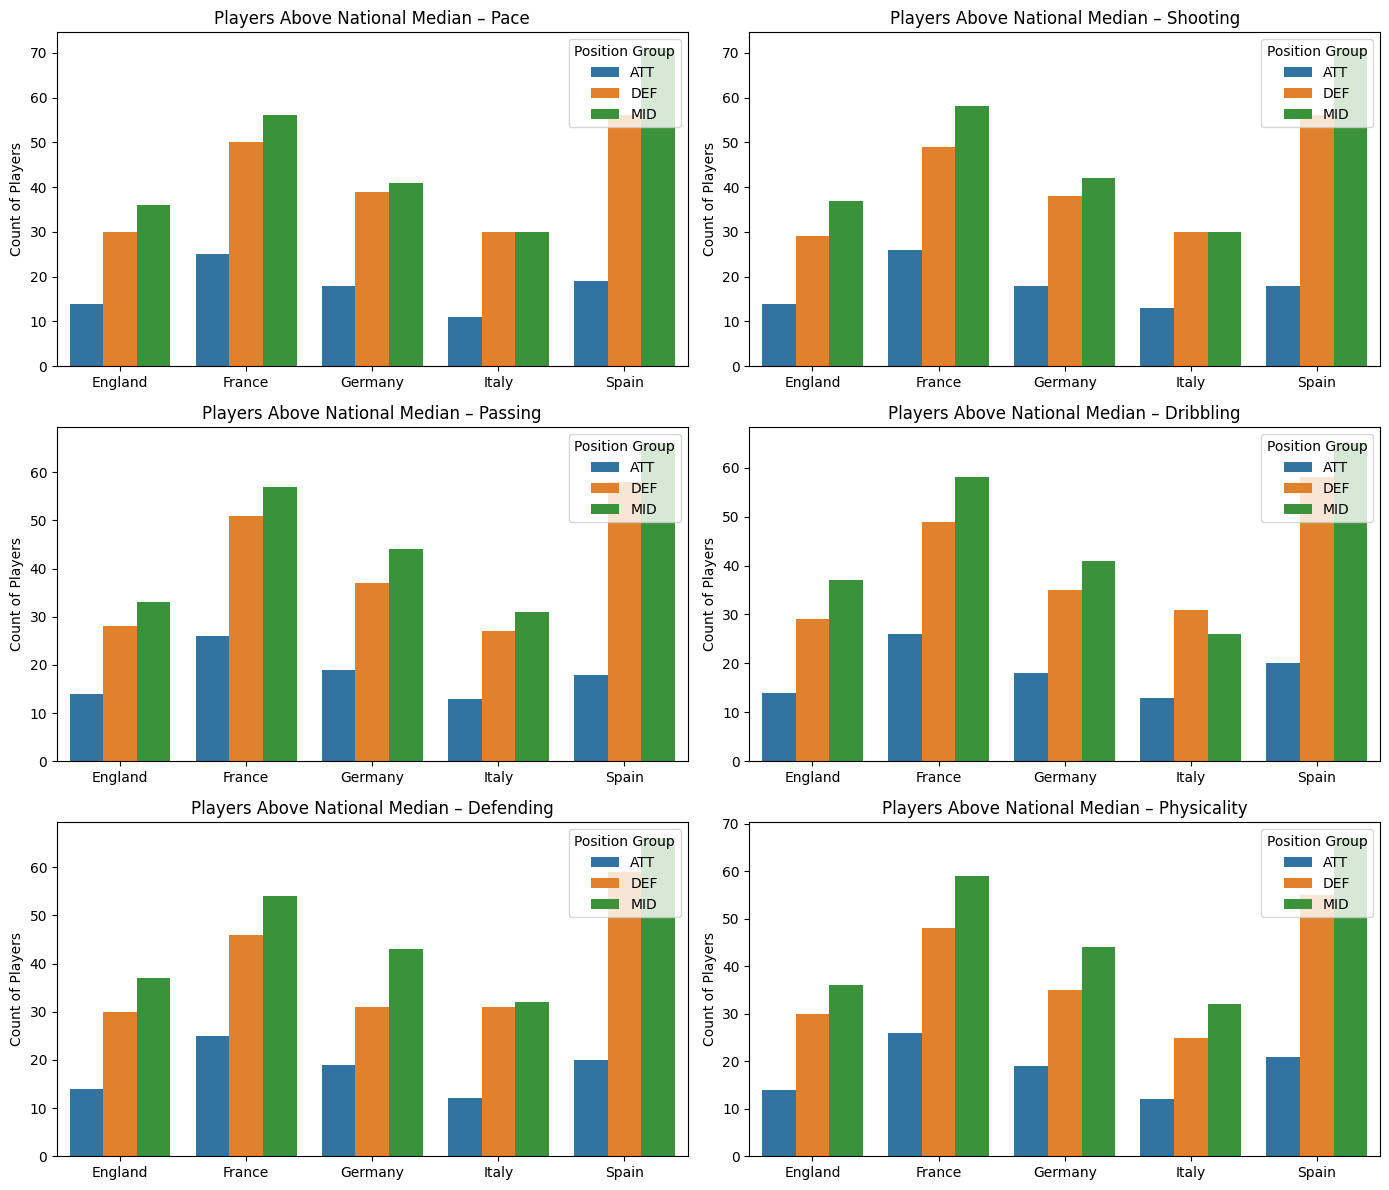

In [38]:
df_plot = men_top5_fps_single_stat_by_nation.reset_index()

stats = [
    "Pace_AboveMedian",
    "Shooting_AboveMedian",
    "Passing_AboveMedian",
    "Dribbling_AboveMedian",
    "Defending_AboveMedian",
    "Physicality_AboveMedian"
]

titles = ["Pace", "Shooting", "Passing", "Dribbling", "Defending", "Physicality"]

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, stat in enumerate(stats):
    sns.barplot(
        data=df_plot,
        x="Nation",
        y=stat,
        hue="PositionGroup",
        ax=axes[i]
    )
    axes[i].set_title(f"Players Above National Median – {titles[i]}")
    axes[i].set_ylabel("Count of Players")
    axes[i].set_xlabel("")
    axes[i].legend(title="Position Group", loc="upper right")

plt.tight_layout()
plt.show()

### 6.2 Barplot for average single stat of women field players by `Nation`

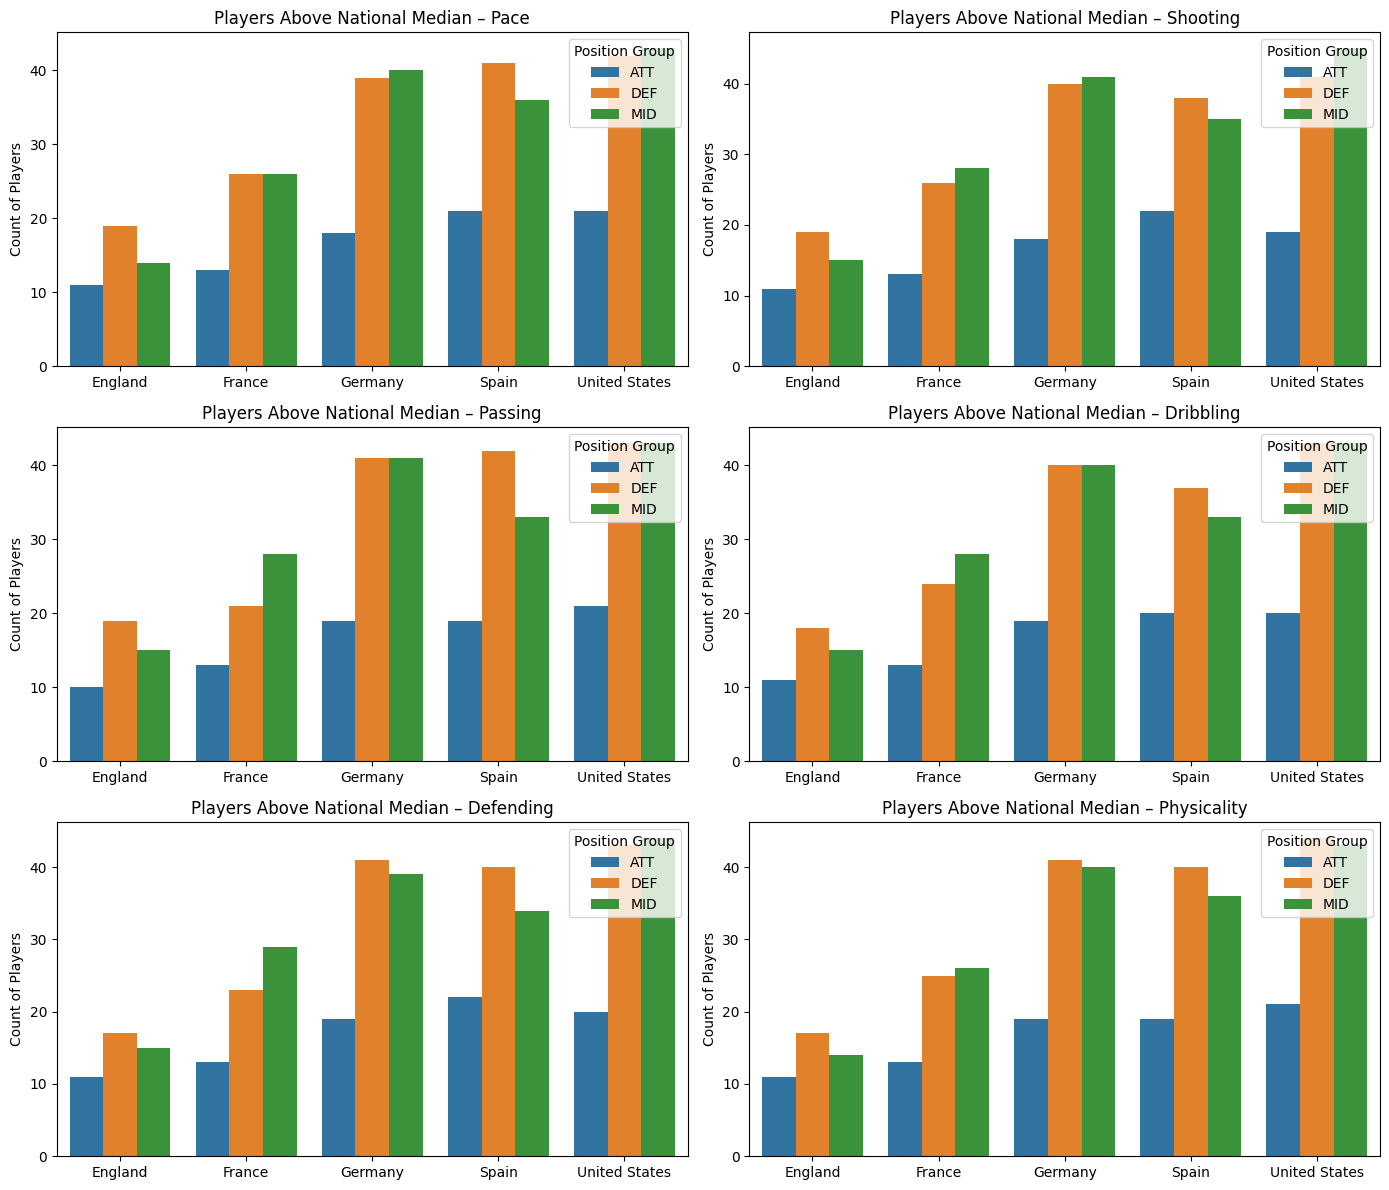

In [39]:
df_plot_w = women_top5_fps_single_stat_by_nation.reset_index()

stats = [
    "Pace_AboveMedian",
    "Shooting_AboveMedian",
    "Passing_AboveMedian",
    "Dribbling_AboveMedian",
    "Defending_AboveMedian",
    "Physicality_AboveMedian"
]

titles = ["Pace", "Shooting", "Passing", "Dribbling", "Defending", "Physicality"]

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, stat in enumerate(stats):
    sns.barplot(
        data=df_plot_w,
        x="Nation",
        y=stat,
        hue="PositionGroup",
        ax=axes[i]
    )
    axes[i].set_title(f"Players Above National Median – {titles[i]}")
    axes[i].set_ylabel("Count of Players")
    axes[i].set_xlabel("")
    axes[i].legend(title="Position Group", loc="upper right")

plt.tight_layout()
plt.show()